In [26]:
import sklearn
import skfuzzy as fuzz
from fcmeans import FCM
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [27]:
demo_df = pd.read_excel('Demo_Refined_withUserID.xlsx')

In [28]:
#fuzzycmeans
#cntr is your cluster means
#break down the clustering results to cntr, u, u0, d, jm, p, fpc
#u is the assignment per record (e.g. the same as the "cluster" column in k-means). There are 4 columns of data and they sum to 1 (e.g. per cluster probabilities)
#".transpose()" is added to fix data in reverse order (variables as rows and cases as columns)
#https://pythonhosted.org/scikit-fuzzy/api/skfuzzy.html#skfuzzy.cmeans
#fpc=final fuzzy parition coefficient 
#cntr-clustermeans


cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(demo_df[['Region', 'Size of manucipality','Household size', 'GenderID','Occupation','Gross income (year)','Social Class', 'Education','Status ', '# children in household','age_category']].transpose(), c=7, m=1.5, error=0.005, maxiter=1000, init=None)
    


In [29]:
demo_df['cluster_0'] = u[0]
demo_df['cluster_1'] = u[1]
demo_df['cluster_2'] = u[2]
demo_df['cluster_3'] = u[3]
demo_df['cluster_4'] = u[4]
demo_df['cluster_5'] = u[5]
demo_df['cluster_6'] = u[6]

In [30]:
#Find the best value of c 
fpcs = []
ncenters = [2,3,4,5,6,7,8,9,10]
for c in ncenters:
    cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(demo_df[['Region', 'Size of manucipality','Household size', 'GenderID','Occupation','Gross income (year)','Social Class', 'Education','Status ', '# children in household','age_category']].transpose(), c=c, m=1.5, error=0.005, maxiter=1000, init=None)
    # Store fpc values for later
    fpcs.append(fpc)

Text(0, 0.5, 'Fuzzy partition coefficient')

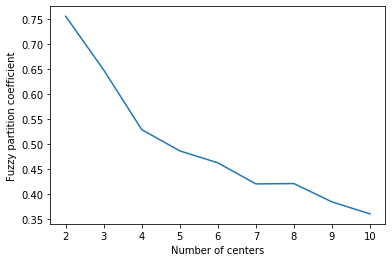

In [31]:
fig, ax = plt.subplots()
ax.plot(np.r_[2:11], fpcs)
ax.set_xlabel("Number of centers")
ax.set_ylabel("Fuzzy partition coefficient")

In [32]:
#output fuzzy cmeans result
demo_df.to_excel('Demo_CMeans_7.xlsx')

In [33]:
#merge c means clustering reults to the consolidated prediction results from step 4 
cm7_df=pd.read_excel('Demo_CMeans_7.xlsx')
pred_df=pd.read_excel('prediction results.xlsx')

joined_df=cm7_df.merge(pred_df, how='left', left_on=['UserID'], right_on=['UserID'])

In [34]:
joined_df.head()

,Unnamed: 0,UserID,Region,Size of manucipality,Household size,GenderID,Occupation,Gross income (year),# children in household,Social Class,...,cluster_3,cluster_4,cluster_5,cluster_6,lsvc_p,dtc_p,knn_p,nbay_p,logreg_p,sum_p
0,0,1,5,6,1,1,2,2,0,5,...,0.627881,0.143010,0.055639,0.071175,0.0,1.0,0.0,0.0,0.0,1.0
1,1,2,3,3,2,2,2,7,0,2,...,0.053477,0.292285,0.283878,0.015014,0.0,4.0,1.0,0.0,0.0,5.0
2,2,4,4,4,5,1,2,5,3,1,...,0.021447,0.099402,0.028903,0.009356,2.0,1.0,1.0,2.0,2.0,8.0
3,3,5,4,5,4,1,2,5,2,2,...,0.001230,0.008912,0.003185,0.000411,8.0,7.0,7.0,7.0,8.0,37.0
4,4,6,2,6,1,1,7,2,0,5,...,0.101371,0.024891,0.013196,0.755756,0.0,3.0,1.0,1.0,0.0,5.0


In [35]:
joined_df.to_excel('CM_Analysis.xlsx')